<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Stuff" data-toc-modified-id="Import-Stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Stuff</a></span><ul class="toc-item"><li><span><a href="#Anonymous-Functions" data-toc-modified-id="Anonymous-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Anonymous Functions</a></span></li><li><span><a href="#Named-Functions" data-toc-modified-id="Named-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Named Functions</a></span></li></ul></li></ul></div>

# Import Stuff

In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pd.options.mode.chained_assignment = None # Suppresses annoying warning

sns.set(font_scale=1.5)
sns.set_context("poster")

with open("tidy_data/pmap_vacuum_beryl_geometry.pkl","rb") as _filein:
    raw_data = pkl.load(_filein)
    
raw_df = pd.DataFrame(raw_data)
raw_df.fill = raw_df.fill.apply(int)
raw_df.config = raw_df.config.apply(int)
raw_df.head()

,config,coupling,energy,fill
0,39,antiferro,-42.682939,1110
1,16,antiferro,-56.918684,1111
2,34,antiferro,-28.454172,1100
3,30,antiferro,-56.918735,1111
4,21,antiferro,-14.224134,1000


## Anonymous Functions

In [10]:
filter_by_fill = lambda fill, df=raw_df: df[df.fill == fill]
filter_by_couple = lambda couple, df: df[df.coupling == couple]


## Named Functions

In [11]:

def zero_energy(fill,couple="antiferro"):
    df = filter_by_couple(couple,filter_by_fill(fill))
    df.sort_values("config",axis=0,inplace=True)
    zero_en = df.energy.values[0]
    df.energy -= zero_en
    scale = len(df.config)-1
    df.config *= 0.01
    
    return df
def plot_zeroed_comparison(couple="antiferro"):
    fig = plt.figure(figsize=(16,12))
    ax = plt.gca()

    for fill in set(raw_df.fill.values):
        if fill == 1000:
            sns.lineplot(x="config",y="energy",data=zero_energy(fill,couple="antiferro"),ax=ax,label="Fill: {}".format(fill))
        else:
            sns.lineplot(x="config",y="energy",data=zero_energy(fill,couple=couple),ax=ax,label="Fill: {}".format(fill))

    ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    ax.set(xlabel="Rotation Angle [rad]",ylabel="Energy [eV]")


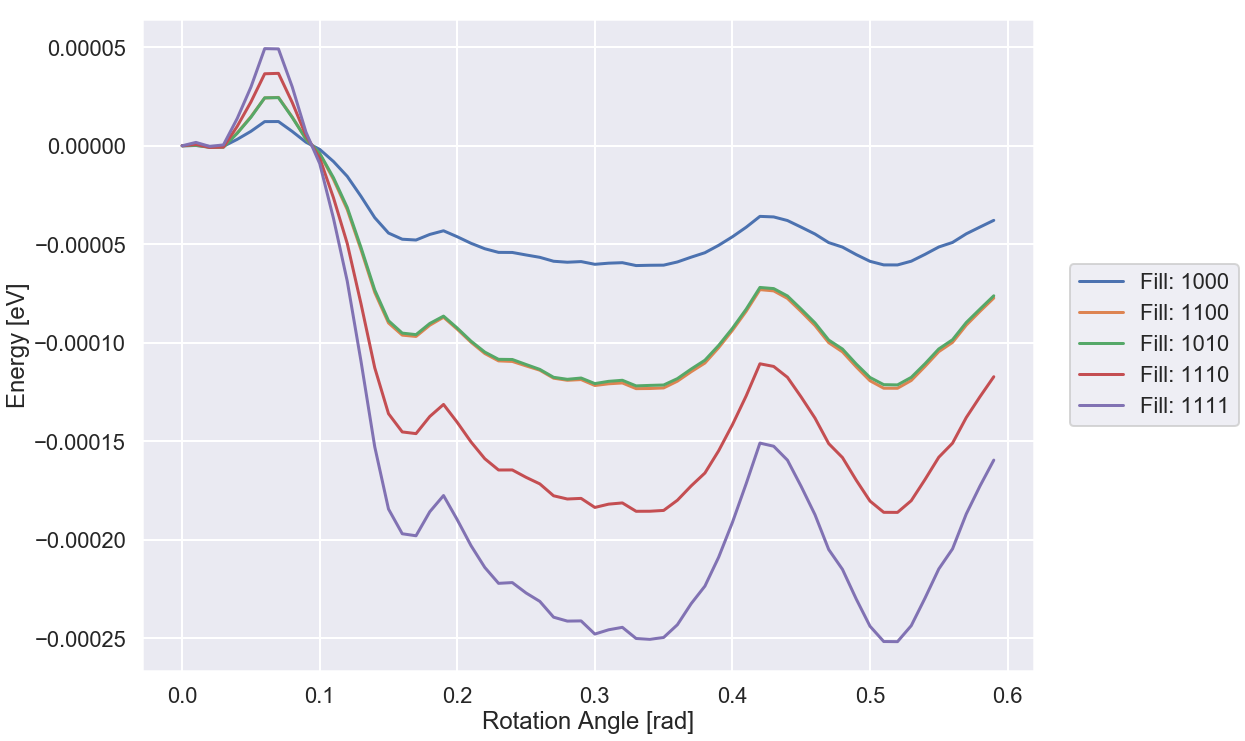

In [12]:
plot_zeroed_comparison()

In [7]:
set(raw_df.fill.values)

{1010, 1100, 1110, 1111}